In [12]:
import cv2
import pandas as pd
from augmentv1.src.main.augment_loader import ImageDataset, RecyclingCodeExtractor, DataLoader, PixelBoundingBox
import matplotlib.pyplot as plt

In [2]:
data_loader = DataLoader("../../data/raw/train")
data_loader.load_images()

In [3]:
code_extract = RecyclingCodeExtractor(data_loader.image_dataset)

In [4]:
code_extract.extract_code()

In [5]:
data_loader.summary(show_class_names=True)

📊 Dataset Summary
----------------------------------------
🖼️  Number of images: 594
💾 Total size: 61.8 MB
🧾 Unique classes: 12
📈 Bounding boxes per class:
    Class 0: 729 boxes
    Class 1: 193 boxes
    Class 2: 90 boxes
    Class 3: 2 boxes
    Class 4: 302 boxes
    Class 5: 149 boxes
    Class 6: 194 boxes
    Class 7: 377 boxes
    Class 8: 7 boxes
    Class 9: 81 boxes
    Class 10: 4 boxes
    Class 11: 1 boxes
📦 Total bounding boxes: 2129
----------------------------------------


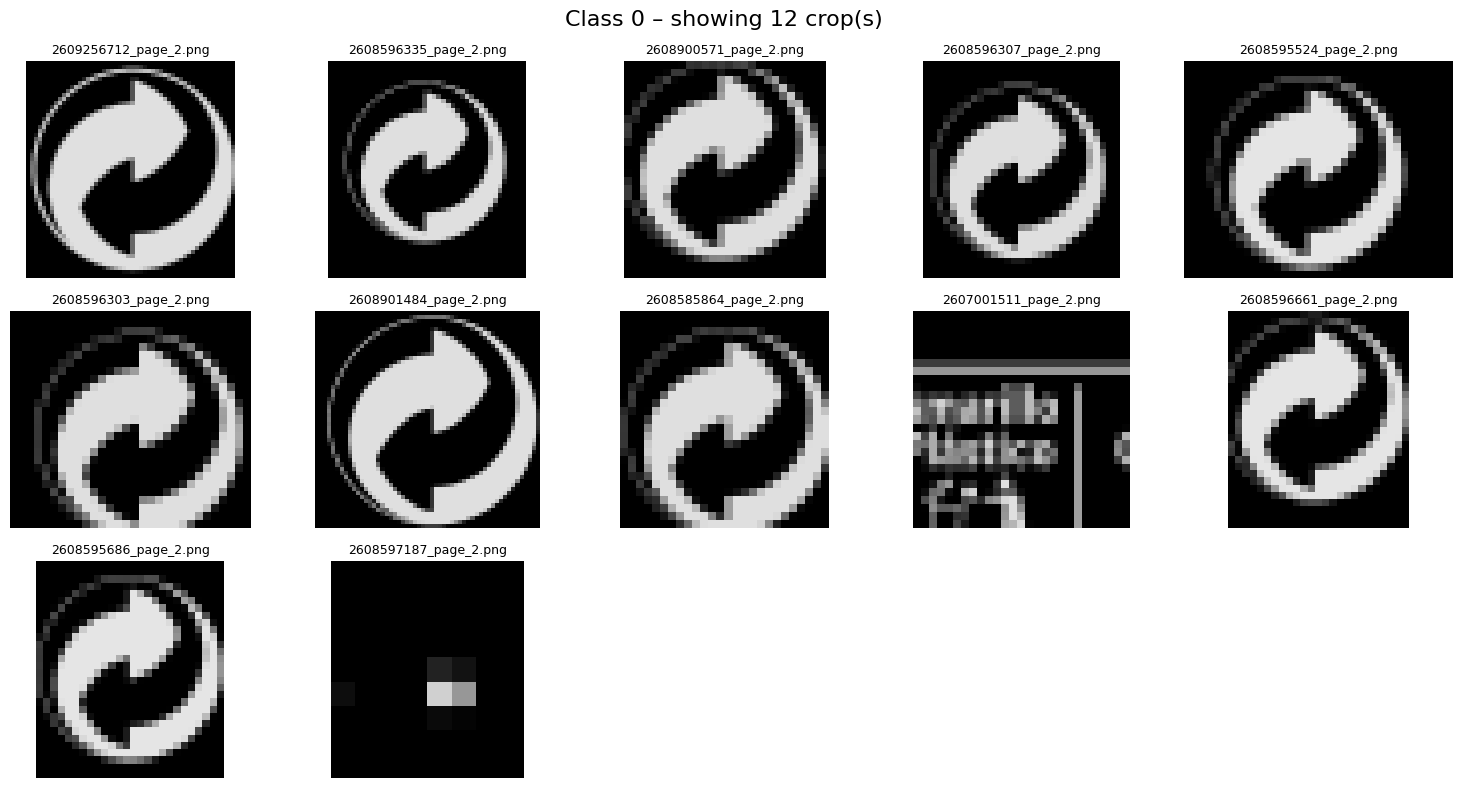

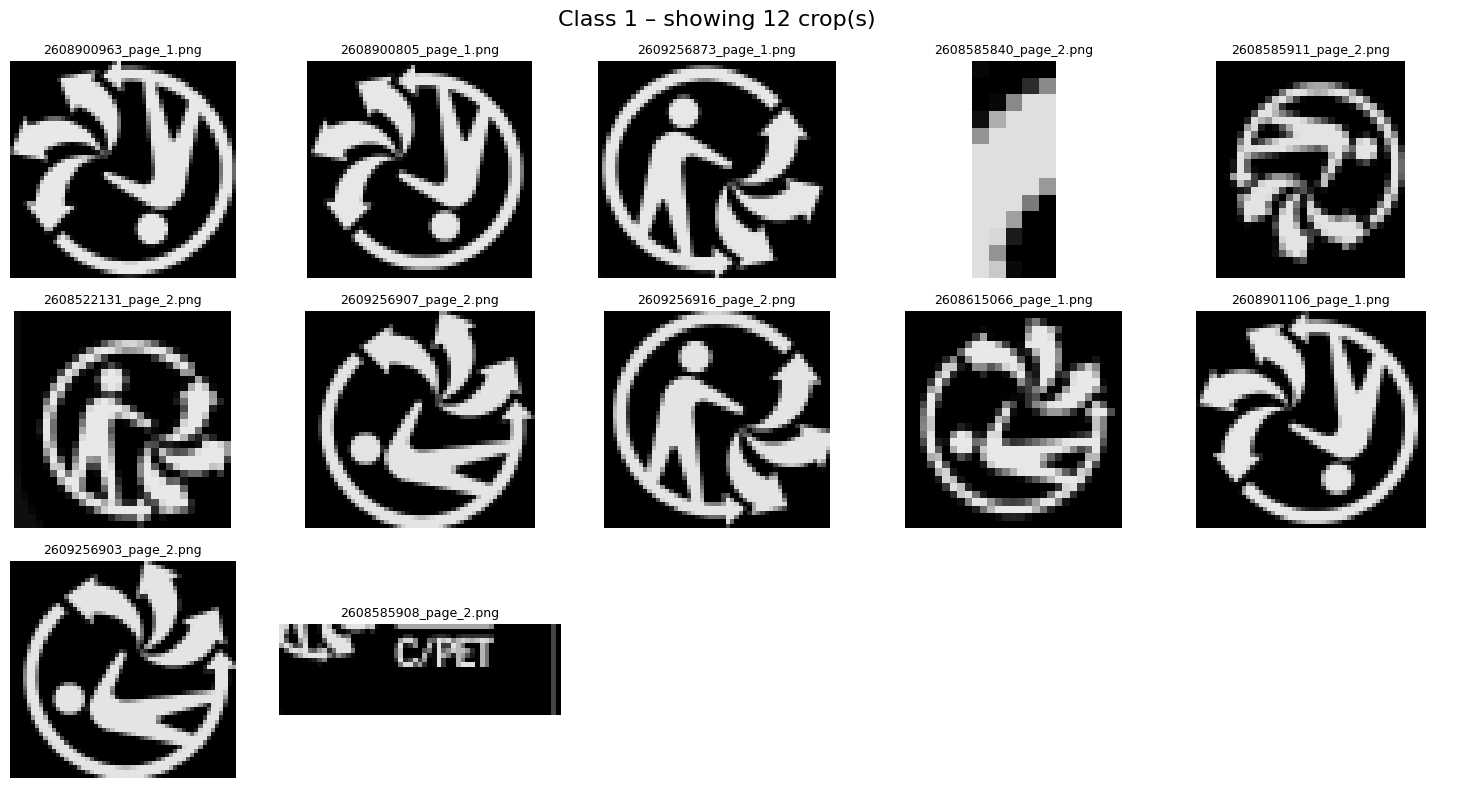

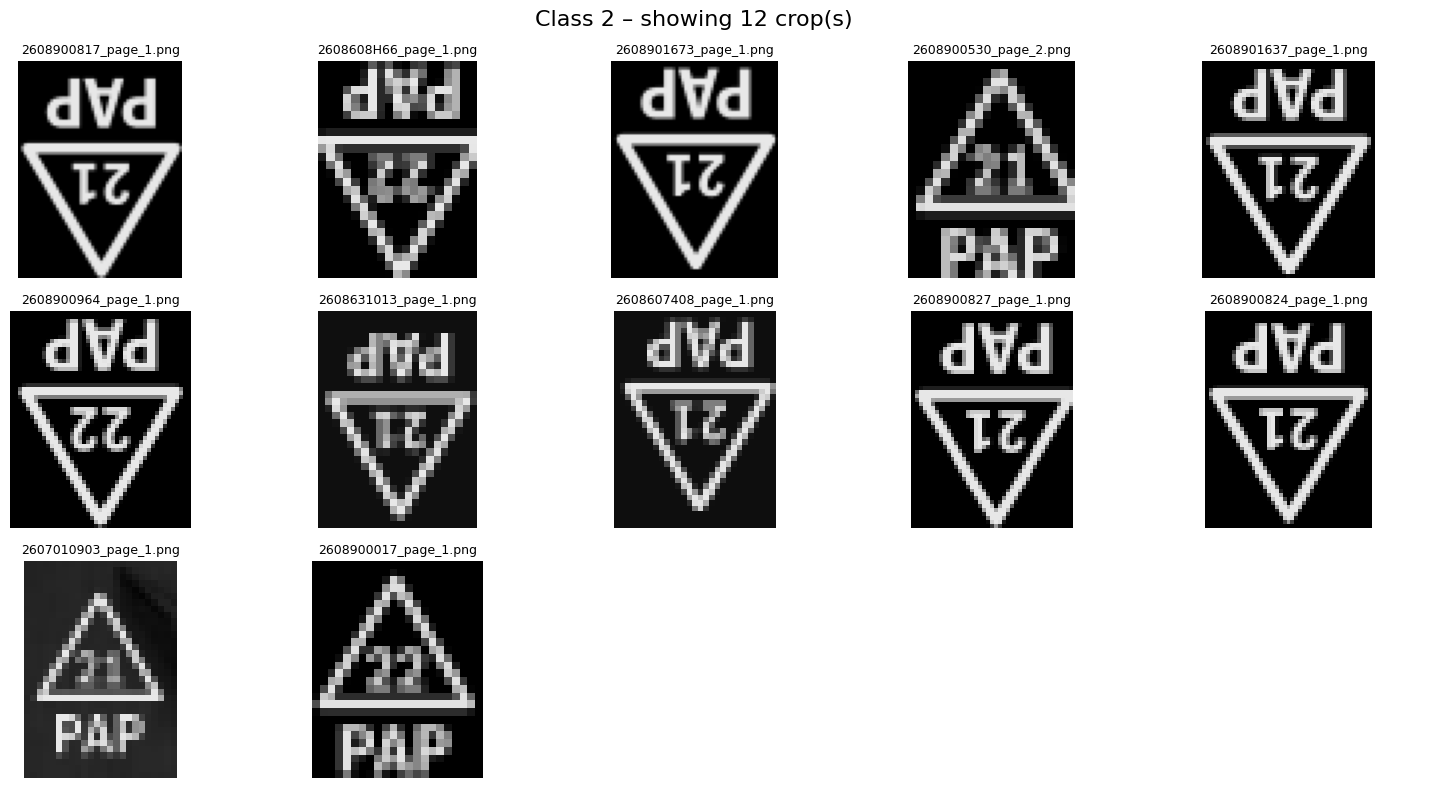

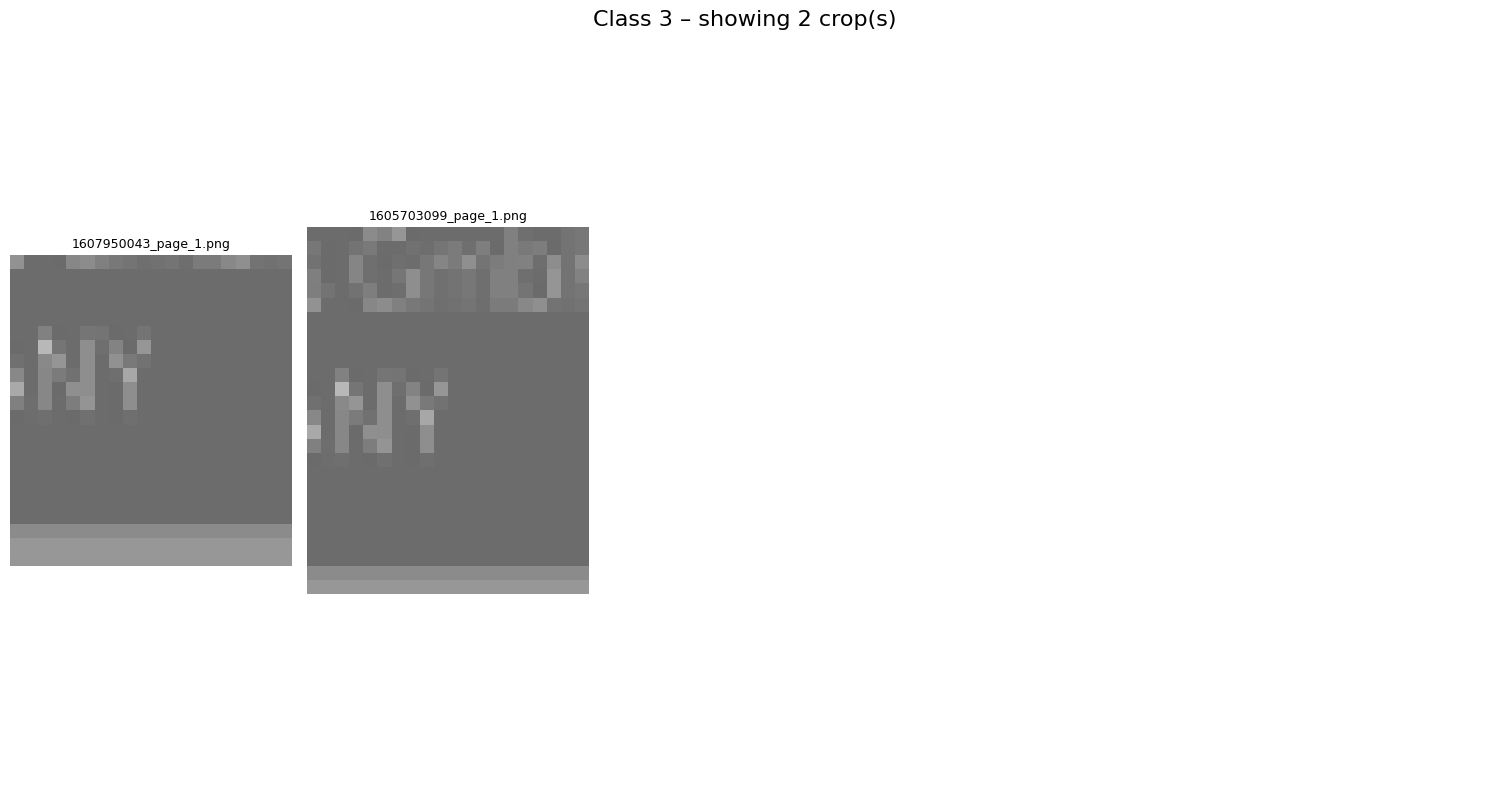

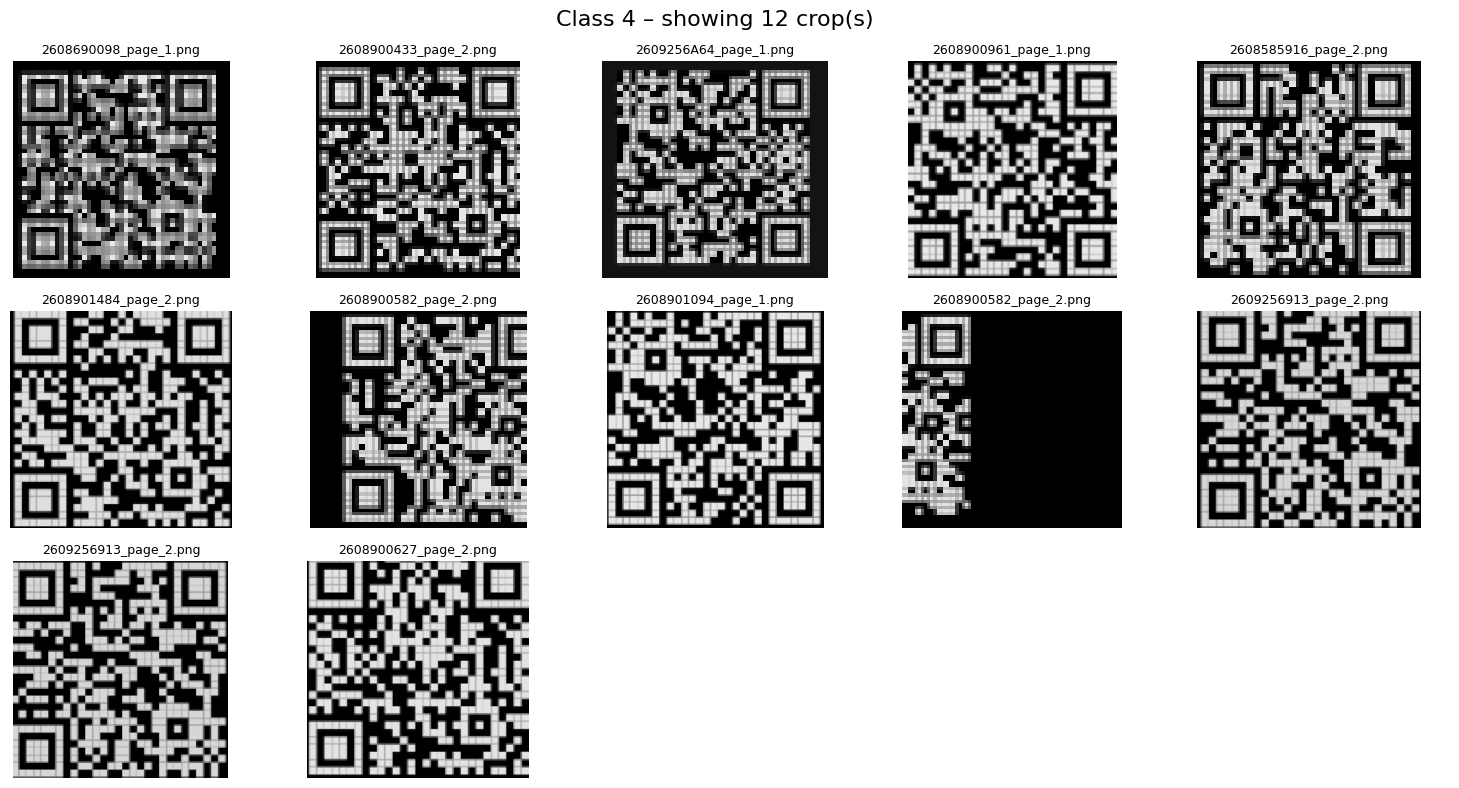

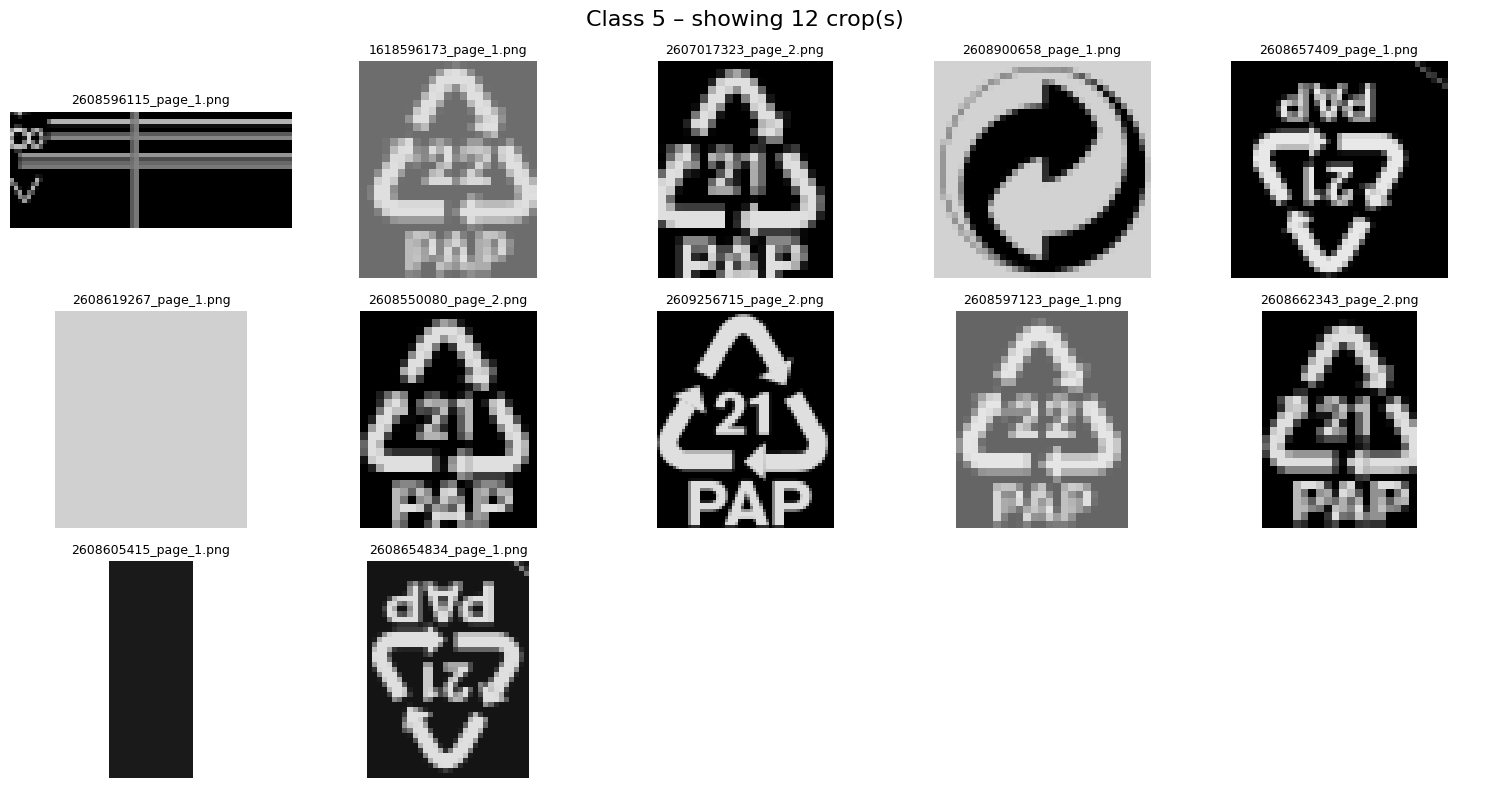

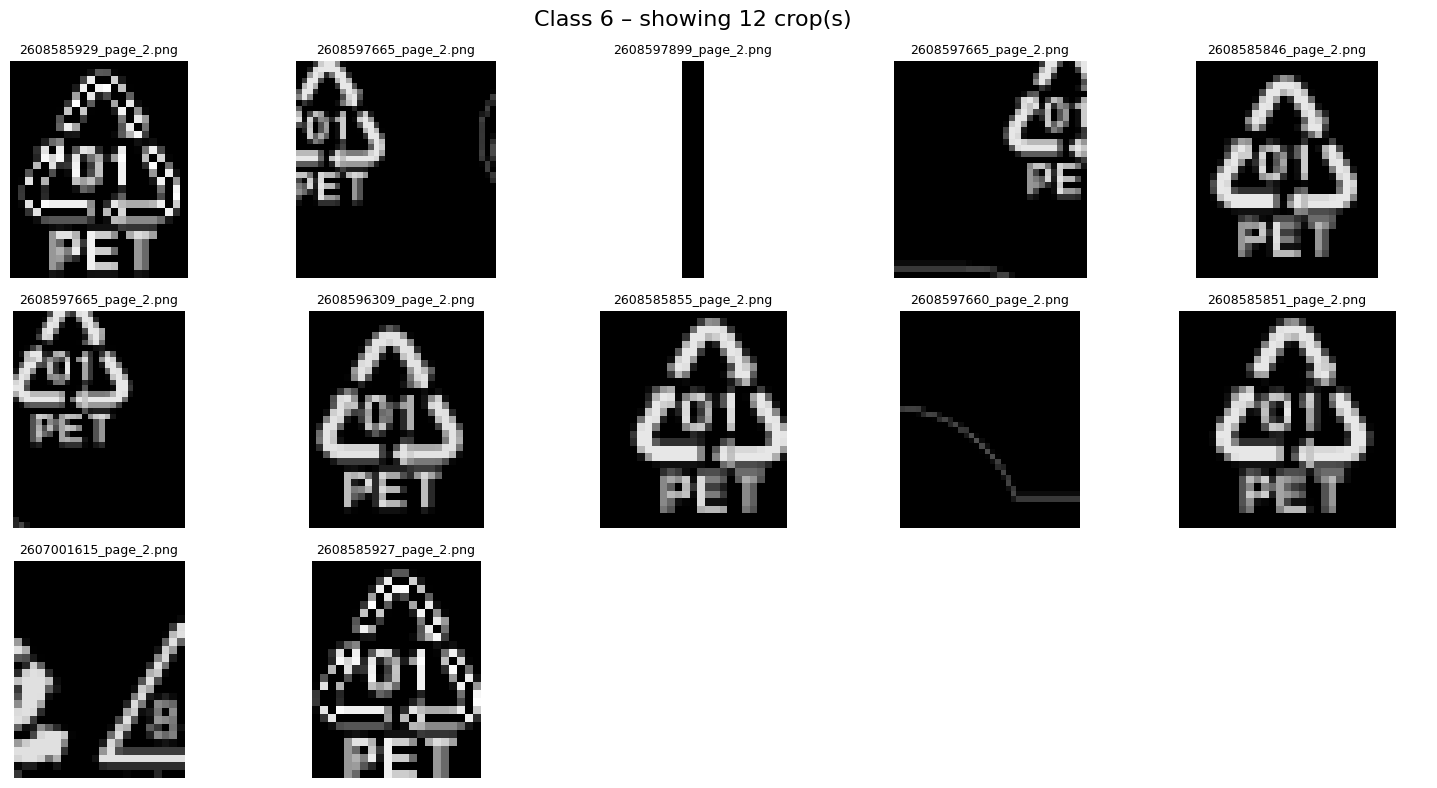

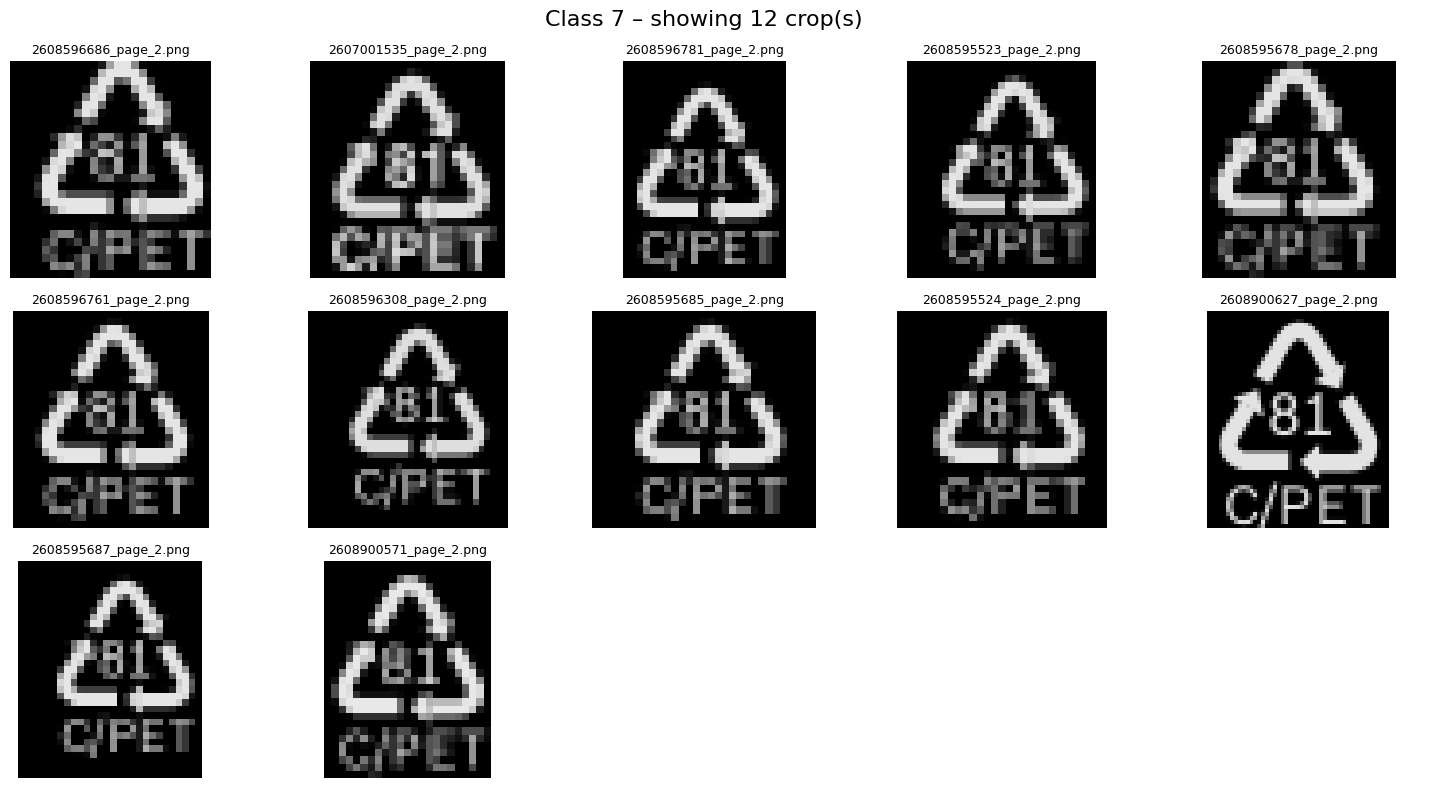

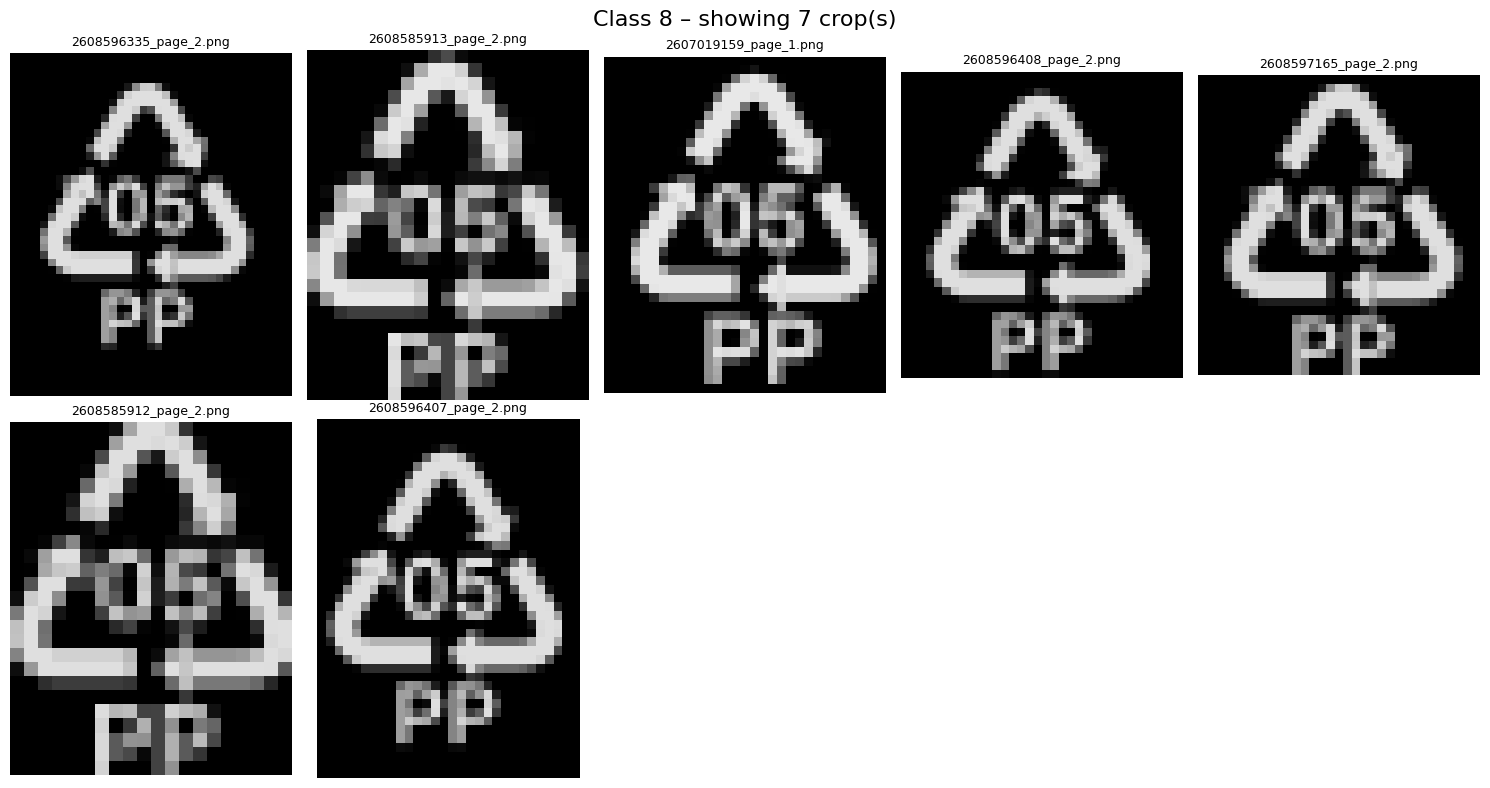

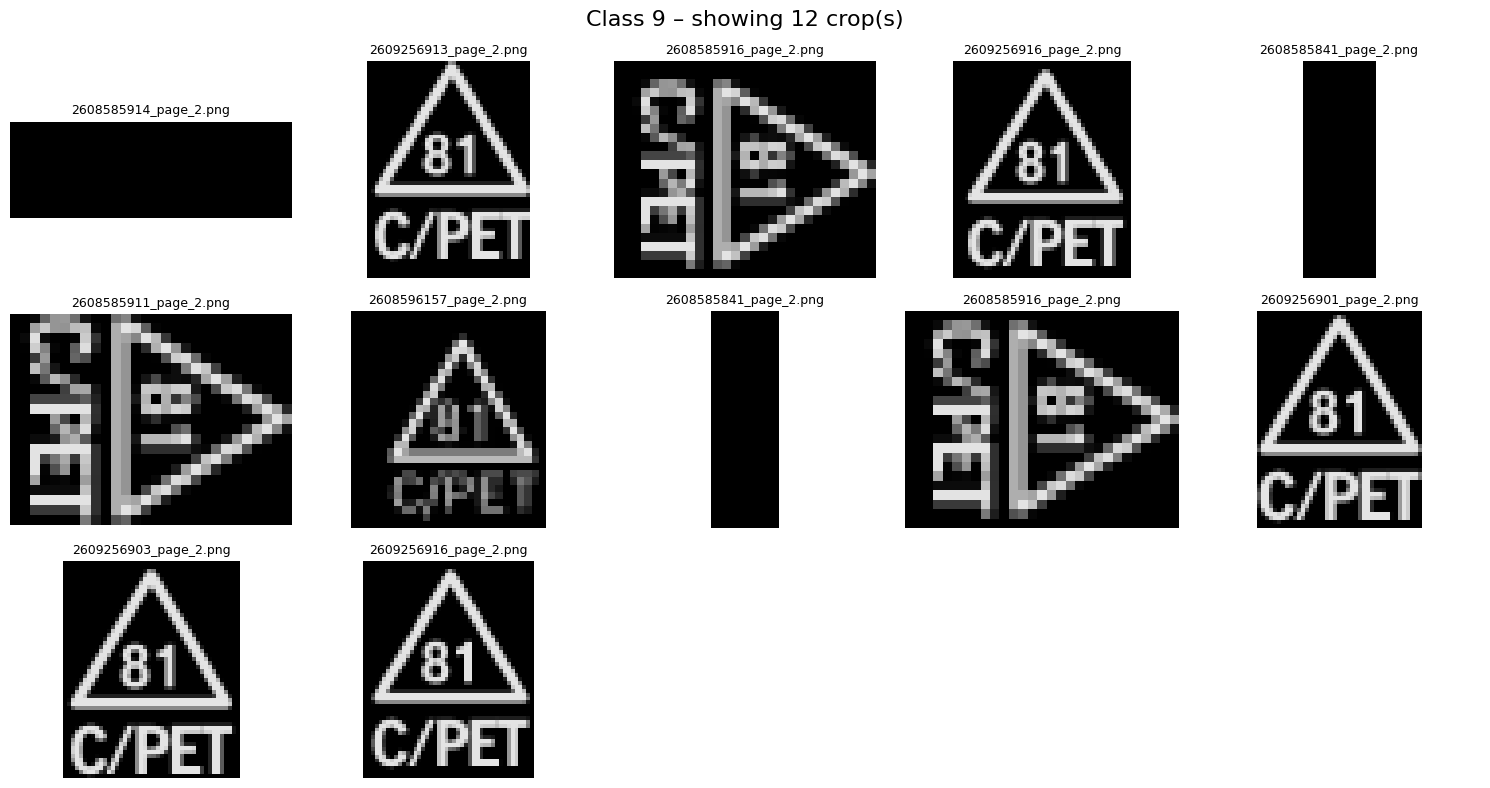

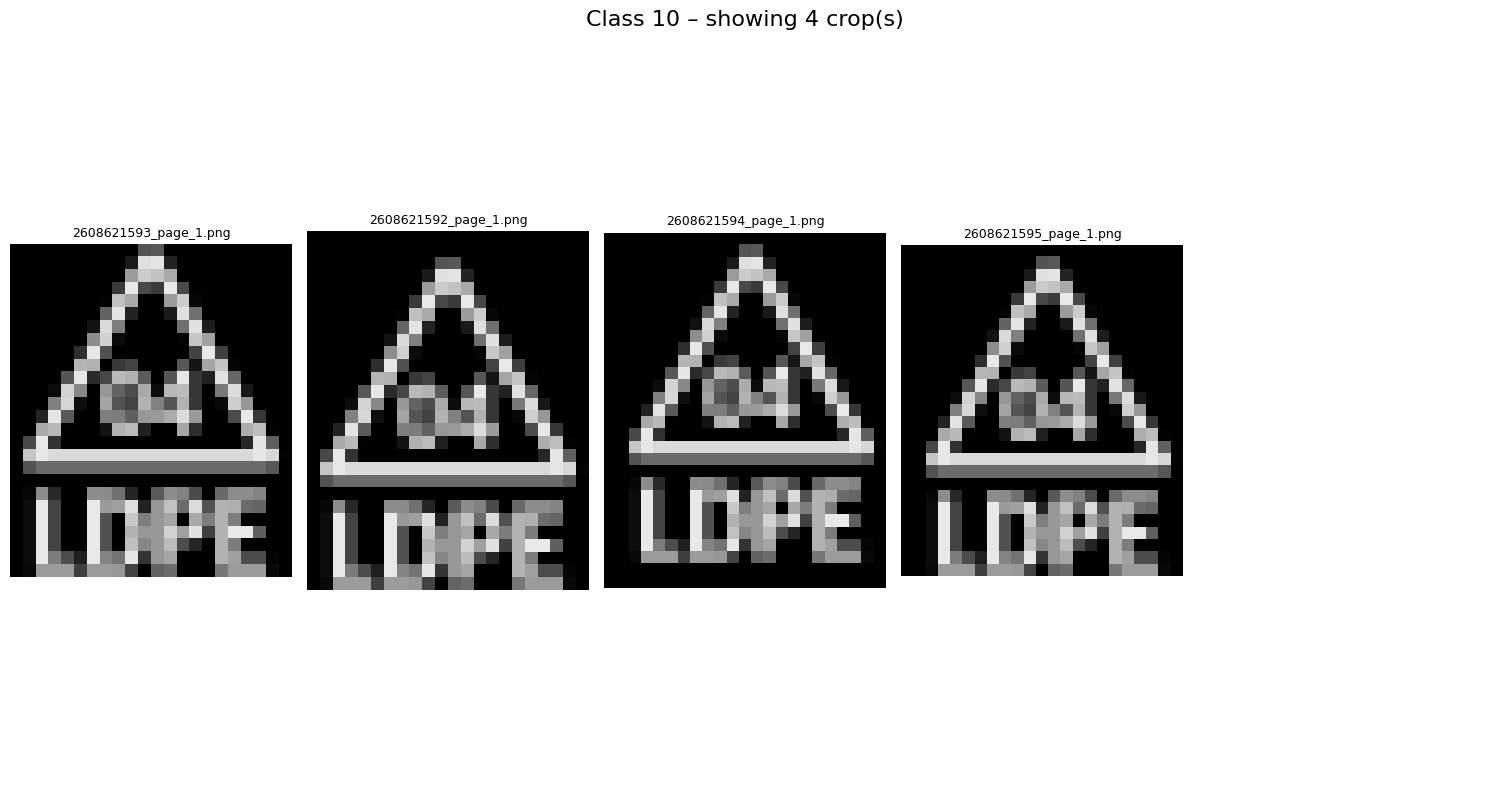

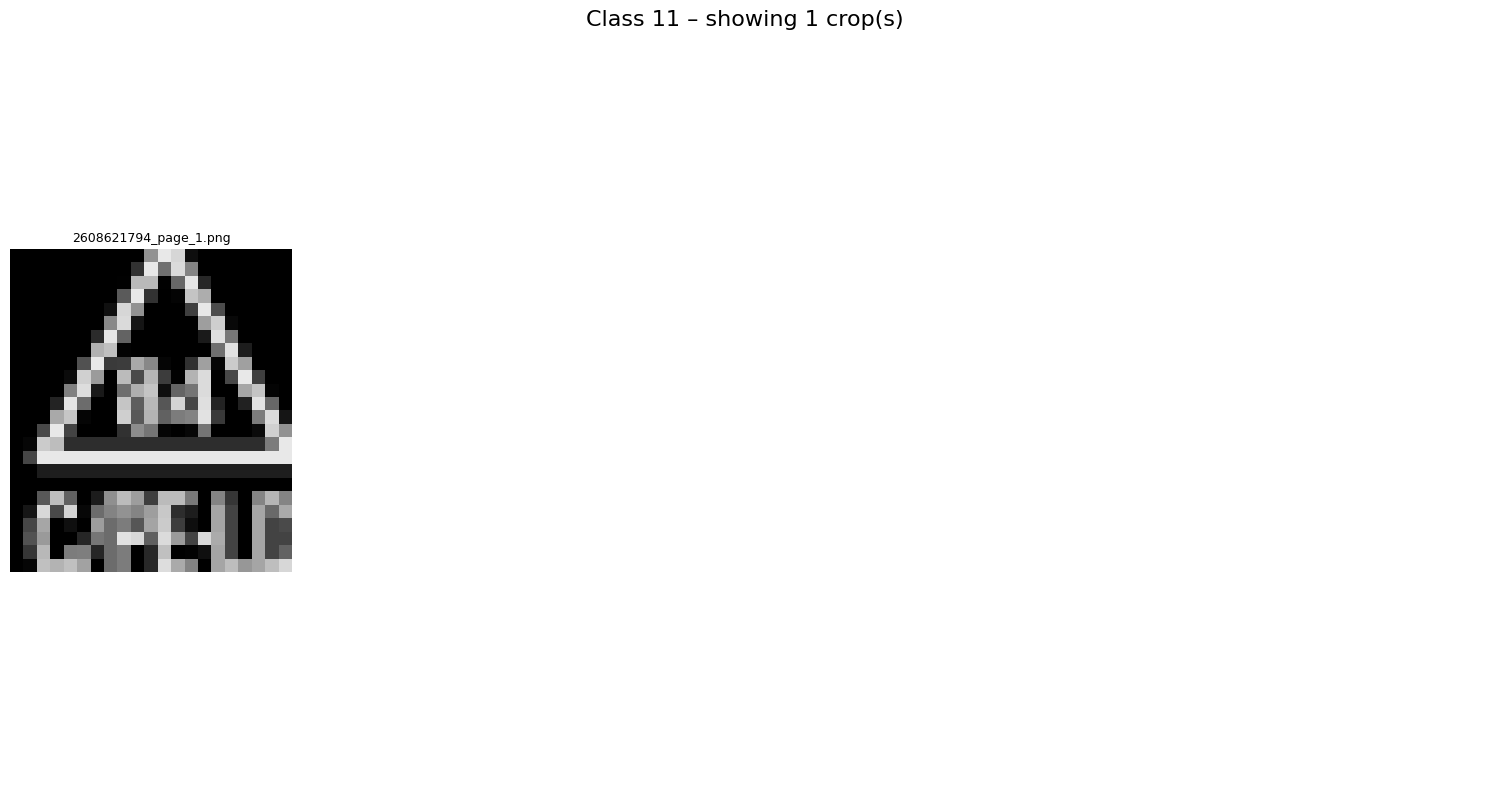

In [6]:
for i in range(0,12):
    code_extract.display_class(i, n=12)

In [7]:
box_info, img =data_loader.query("filename", "2608656019_page_1.png")

In [8]:
box_info[0][1]

PixelBoundingBox(x1=247, y1=217, x2=274, y2=256, cls=5)

In [9]:
for info in box_info:
    x1, y1, x2, y2, cls = info[1]
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

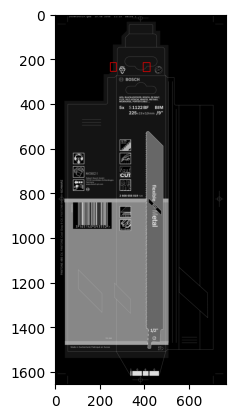

In [10]:
plt.imshow(img)

In [7]:
box_set = set()
for file_name, img, boxes in data_loader.image_dataset:
    for box in boxes:
        box_set.add(box.cls)

In [8]:
box_set

{0, 1, 2, 4, 5, 6, 7, 8, 9, 10}

In [11]:
img_name, img = data_loader.image_dataset.images[0]
h, w = data_loader.image_dataset.image_shapes[img_name]

In [14]:

original_pixel_box = PixelBoundingBox(x1=874.6944, y1=423.5, x2=944.1389, y2=501.2778, cls=0)

x_center = ((original_pixel_box.x1 + original_pixel_box.x2) / 2) / w
y_center = ((original_pixel_box.y1 + original_pixel_box.y2) / 2) / h
width = (original_pixel_box.x2 - original_pixel_box.x1) / w
height = (original_pixel_box.y2 - original_pixel_box.y1) / h

print("YOLO Box:", round(x_center, 6), round(y_center, 6), round(width, 6), round(height, 6))

x_center_abs = x_center * w
y_center_abs = y_center * h
width_abs = width * w
height_abs = height * h

x1 = x_center_abs - width_abs / 2
y1 = y_center_abs - height_abs / 2
x2 = x_center_abs + width_abs / 2
y2 = y_center_abs + height_abs / 2

print("Recovered Box:", round(x1, 4), round(y1, 4), round(x2, 4), round(y2, 4))


YOLO Box: 1.18878 0.376232 0.090777 0.063285
Recovered Box: 874.6944 423.5 944.1389 501.2778


In [15]:
img = data_loader.image_dataset.get_image("2608656019_page_1.png")
print("Loaded image shape:", img.shape)


Loaded image shape: (1655, 765, 3)
